In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.markers import MarkerStyle
import scipy as sp
import pandas as pd
import matplotlib as mpl

In [2]:
bas = [0 for i in range(20)]
arr = [0 for i in range(24)]
arr2 = [0 for i in range(24)]

for i in range(len(arr)):
    if (i==0):
        bas[i] = round(0.05,2)
        arr[i] = round(bas[i]**2,4)
        arr2[i] = arr[i]
    if (i<19):
        bas[i] = round(bas[i-1] + 0.05,2)
        arr[i] = round(bas[i]**2,4)
        arr2[i] = arr[i]
    if (i==19):
        arr[i] = 1.0
        arr2[i] = 1
    if (i>19):
        arr[i] = round(arr[i-1] + 0.2,2)
        arr2[i] = arr[i]


In [3]:
arr

[0.0025,
 0.01,
 0.0225,
 0.04,
 0.0625,
 0.09,
 0.1225,
 0.16,
 0.2025,
 0.25,
 0.3025,
 0.36,
 0.4225,
 0.49,
 0.5625,
 0.64,
 0.7225,
 0.81,
 0.9025,
 1.0,
 1.2,
 1.4,
 1.6,
 1.8]

In [4]:
tau = np.linspace(0,1,201)
arr_sq = []

for i in range(24):
    arr_sq.append(arr[i]**2)

In [5]:
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0

g = 0
h = 0

index = 0

In [6]:
for k in arr2:
    globals()['N_BETA1G{}'.format(k)] = pd.read_csv('./NCA_OCA/NCA_test_g{}.txt'.format(k),header=None,names=['x','y'],delim_whitespace=True)

    globals()['N_1_{}'.format(b)] = np.array(globals()['N_BETA1G{}'.format(k)].y)
    b += 1
    
a += 1
b = 0

a = 0
b = 0

In [7]:
for k in arr2:
    globals()['O_BETA1G{}'.format(k)] = pd.read_csv('./NCA_OCA/OCAtest_gfactor_1_beta05{}.txt'.format(k),header=None,names=['x','y'],delim_whitespace=True)

    globals()['O_1_{}'.format(b)] = np.array(globals()['O_BETA1G{}'.format(k)].y)
    b += 1
    
a += 1
b = 0

a = 0
b = 0

In [8]:
size = 51
beta = 1.0
omega = 1

In [9]:
for k in arr:
    globals()['ED_BETA1G{}'.format(k)] = pd.read_csv('./high/Exacttest_size{}_beta{}_omega{}_g_{}.txt'.format(size,beta,omega,k),header=None,names=['x','y'],delim_whitespace=True)

    globals()['ED_1_{}'.format(f)] = np.array(globals()['ED_BETA1G{}'.format(k)].x)
    f += 1 
    
e += 1
f = 0

In [28]:
TO_1_14 = np.array(pd.read_csv('StS0_1_4.dat',header=None,names=['x','y'],delim_whitespace=True).y)

In [11]:
l = 0;
m = 0;

Ntaumid1 = []
Otaumid1 = []
Etaumid1 = []

Nbeta = []
Obeta = []
Ebeta = []

for m in range(0,24):
    Ntaumid1.append(globals()['N_1_{}'.format(m)][99])
    Otaumid1.append(globals()['O_1_{}'.format(m)][99])
    Etaumid1.append(globals()['ED_1_{}'.format(m)][99])

for m in range(0,24):
    Nbeta.append(globals()['N_1_{}'.format(m)][0])
    Obeta.append(globals()['O_1_{}'.format(m)][0])
    Ebeta.append(globals()['ED_1_{}'.format(m)][0])
#np.savetxt('gsquareplus.txt',gsqaureplus)
#np.savetxt('NTaumid.txt',Ntaumid1)

In [30]:
gc = 21
siz = str(size)
tit1 = str(arr[gc])
tit2 = str(1)
    

(0.2900258392294687, 0.762728)

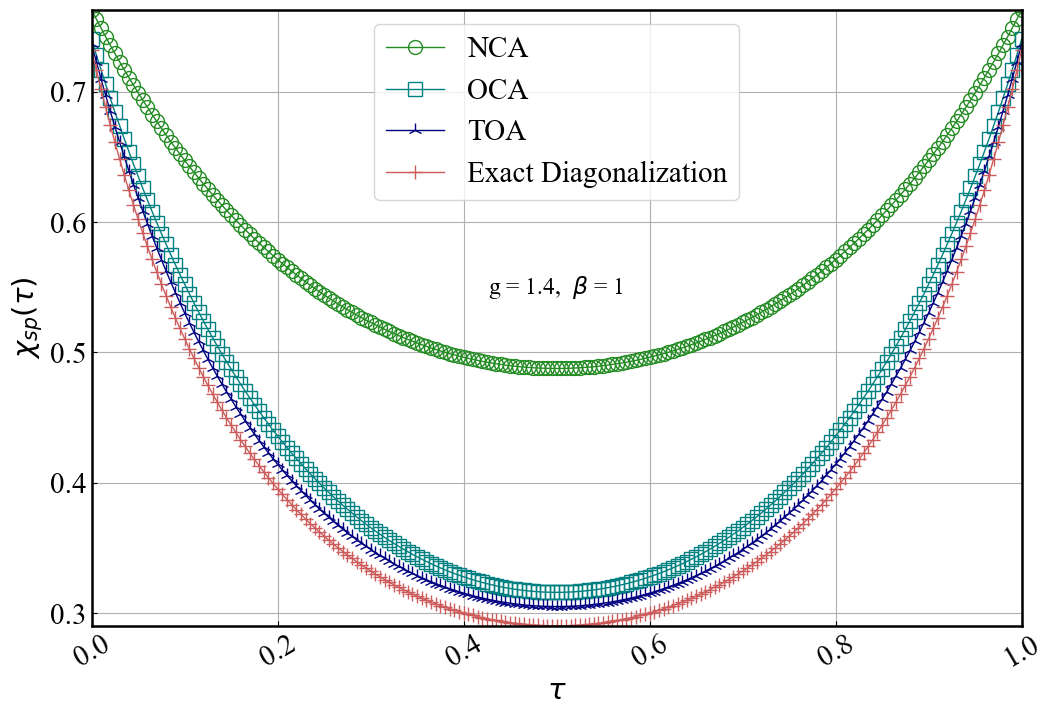

In [35]:
fig = plt.figure(figsize=(12,8))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 21})
mk = MarkerStyle('o','none')
gs = GridSpec(nrows=1, ncols=1, width_ratios=[1], height_ratios=[1])
mpl.rcParams['axes.linewidth'] = 1.8

ax0 = fig.add_subplot(gs[0,0])

ax0.plot(tau,globals()['N_1_{}'.format(gc)],label='NCA',linewidth='1', color = 'forestgreen',marker='o',mfc='None',markersize=10)
ax0.plot(tau,globals()['O_1_{}'.format(gc)],label='OCA',linewidth='1', color = 'teal',marker='s',mfc='None',markersize=10)
ax0.plot(tau,TO_1_14,label='TOA',linewidth='1',color='navy',marker='2',markersize=10)
ax0.plot(tau,globals()['ED_1_{}'.format(gc)],label='Exact Diagonalization',linewidth='1',color = 'indianred',marker='+',markersize=10)
plt.text(0.426,0.545,'g = ' + tit1 + r',  $\beta$ = ' + tit2 ,fontsize=17)
plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xticks(rotation=30)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')
ax0 = plt.gca()
ax0.set_xlim([min(tau), max(tau)])
ax0.set_ylim([min(ED_1_21), max(N_1_21)])

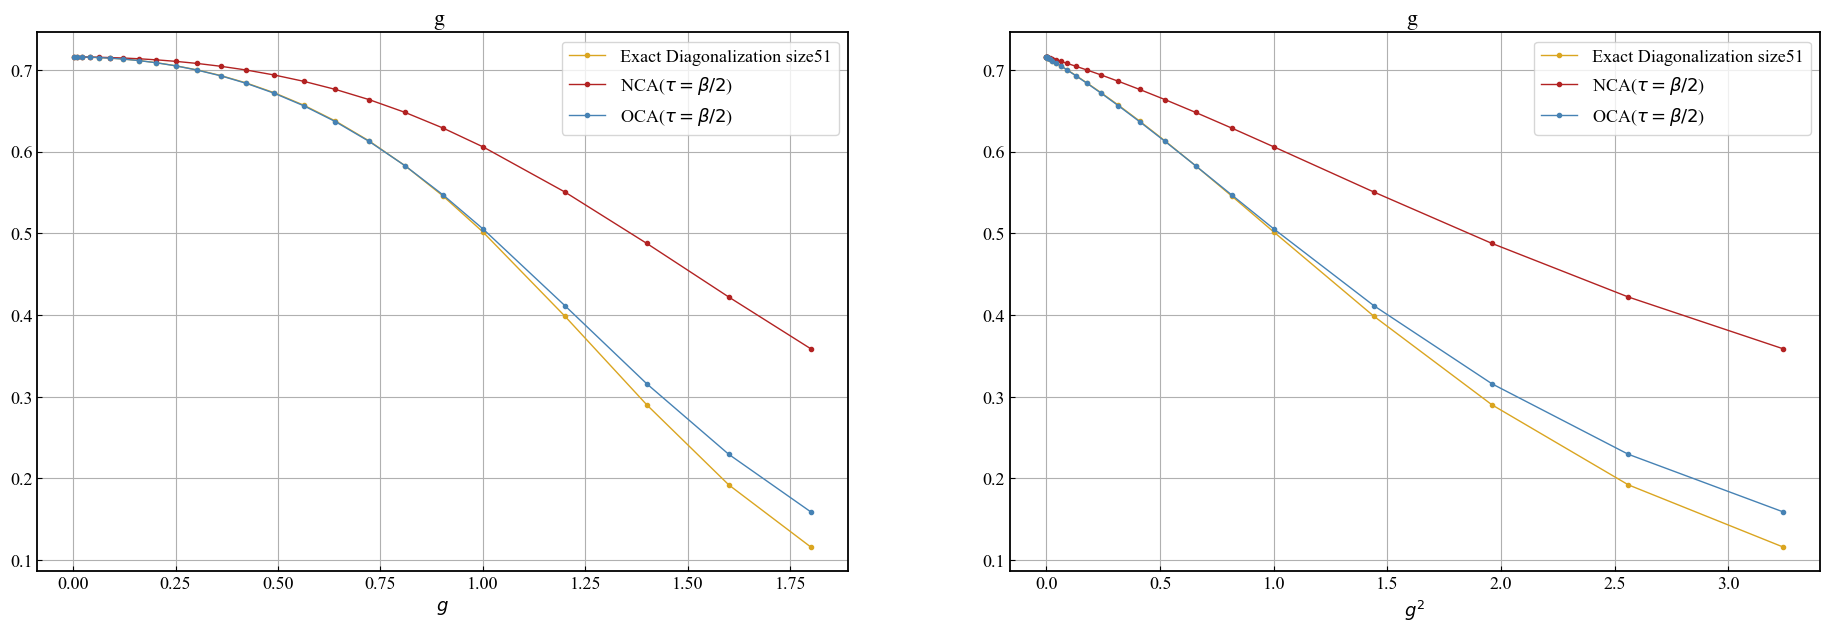

In [14]:
fig = plt.figure(figsize=(23,7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
mpl.rcParams['axes.linewidth'] = 1.3

#plt.axis([min(tau1), max(tau1), 0.868, 0.87] )
ax1= fig.add_subplot(gs[0,0])
ax1.plot(arr,Etaumid1,linewidth='1',color='goldenrod',marker='.',label='Exact Diagonalization size'+siz)
ax1.plot(arr,Ntaumid1,label=r'NCA($\tau = \beta/2$)',linewidth='1',color='firebrick',marker='.')
ax1.plot(arr,Otaumid1,label=r'OCA($\tau = \beta/2$)',linewidth='1',color='steelblue',marker='.')
#ax1.set_xticks(arr1])
#ax1.icklabels(arr1], rotat)
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
#plt.text(0.1,0.033,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.title(r"g ")
plt.xlabel(r"$g$")
plt.legend()
plt.grid()

ax2= fig.add_subplot(gs[0,1])
ax2.plot(arr_sq,Etaumid1,linewidth='1',color='goldenrod',marker='.',label='Exact Diagonalization size'+siz)
ax2.plot(arr_sq,Ntaumid1,label=r'NCA($\tau = \beta/2$)',linewidth='1',color='firebrick',marker='.')
ax2.plot(arr_sq,Otaumid1,label=r'OCA($\tau = \beta/2$)',linewidth='1',color='steelblue',marker='.')
#ax1.set_xticks(arr1])
#ax1.icklabels(arr1], rotat)
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
#plt.text(0.1,0.033,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.title(r"g ")
plt.xlabel(r"$g^2$")
plt.legend()
plt.grid()

'''
ax2= fig.add_subplot(gs[1, 1])
ax2.plot(arreta0,labe(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax2.plot(arrbeta0,labs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax2.plot(arreta0,labe(ED-revOCA)',linewidth='1',color='plum')
ax2.plot(arrtaubeta0[rker='*',color='green')
ax2.plot(arrNtaubeta0arker='*',color='darkorchid')
ax2.plot(arrtaubeta0[rker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.legend()
plt.text(0.1,0.015,r'$\chi_{sp}(\tau=\beta)$',fontsize=12)
plt.xlabel('g')
plt.grid()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
'''

'''
a = plt.axes([0.365, 0.58, 0.3, 0.2])
plt.plot(tau,globals()['SIGNDEV_0_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'mediumvioletred')
plt.plot(tau,globals()['PREDEV_0_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'mediumseagreen')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()
'''

plt.show()

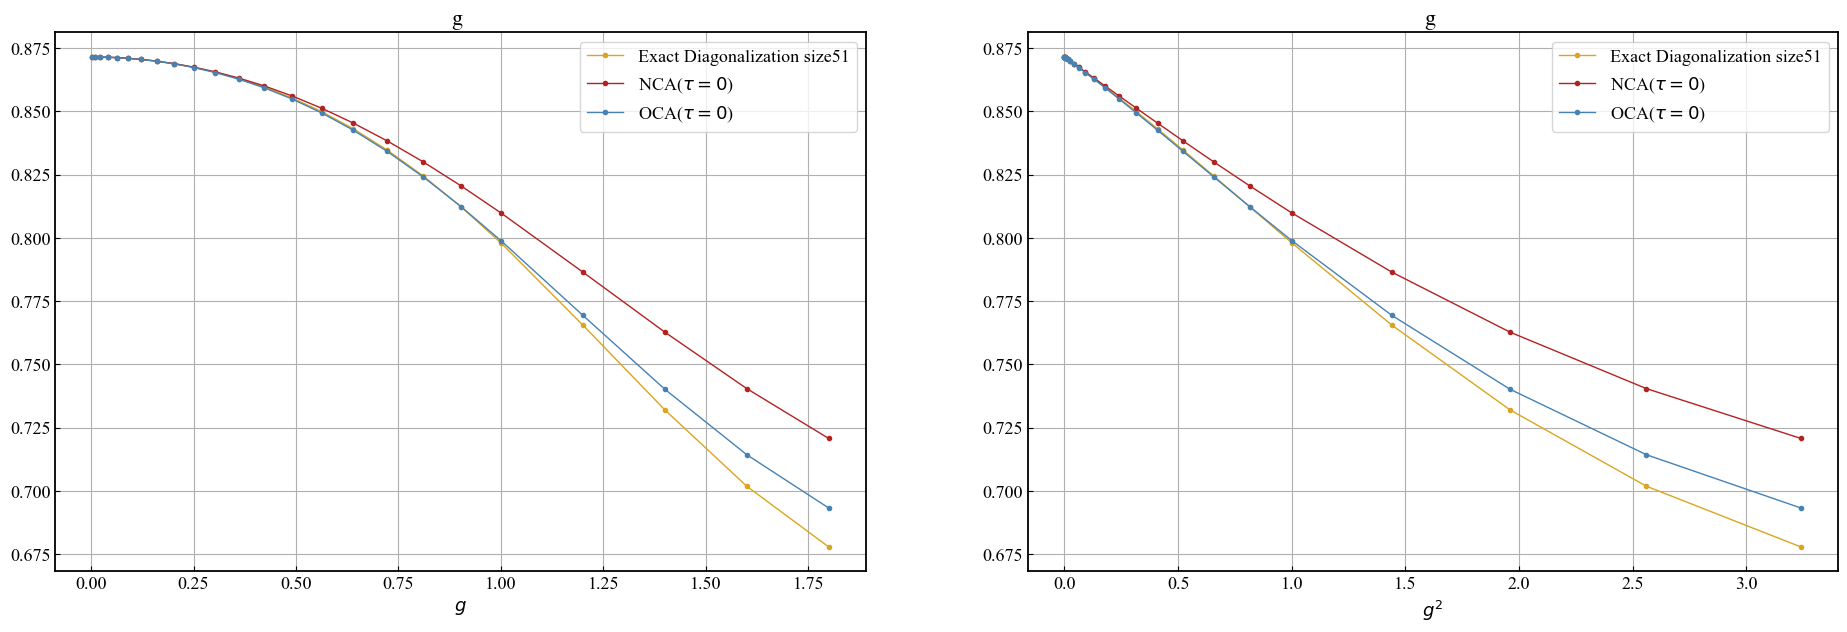

In [15]:
tit1 = str(arr[gc])
tit2 = str(1)
    
fig = plt.figure(figsize=(23,7))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
mpl.rcParams['axes.linewidth'] = 1.3

#plt.axis([min(tau1), max(tau1), 0.868, 0.87] )
ax1= fig.add_subplot(gs[0,0])
ax1.plot(arr,Ebeta,linewidth='1',color='goldenrod',marker='.',label='Exact Diagonalization size'+siz)
ax1.plot(arr,Nbeta,label=r'NCA($\tau = 0$)',linewidth='1',color='firebrick',marker='.')
ax1.plot(arr,Obeta,label=r'OCA($\tau = 0$)',linewidth='1',color='steelblue',marker='.')
#ax1.set_xticks(arr1])
#ax1.icklabels(arr1], rotat)
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
#plt.text(0.1,0.033,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.title(r"g ")
plt.xlabel(r"$g$")
plt.legend()
plt.grid()

ax2= fig.add_subplot(gs[0,1])
ax2.plot(arr_sq,Ebeta,linewidth='1',color='goldenrod',marker='.',label='Exact Diagonalization size'+siz)
ax2.plot(arr_sq,Nbeta,label=r'NCA($\tau = 0$)',linewidth='1',color='firebrick',marker='.')
ax2.plot(arr_sq,Obeta,label=r'OCA($\tau = 0$)',linewidth='1',color='steelblue',marker='.')
#ax1.set_xticks(arr1])
#ax1.icklabels(arr1], rotat)
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
#plt.text(0.1,0.033,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
plt.title(r"g ")
plt.xlabel(r"$g^2$")
plt.legend()
plt.grid()

'''
ax2= fig.add_subplot(gs[1, 1])
ax2.plot(arreta0,labe(ED-preNCA)',linewidth='1',color='mediumseagreen')
ax2.plot(arrbeta0,labs(ED-revNCA)',linewidth='1',color='mediumvioletred')
ax2.plot(arreta0,labe(ED-revOCA)',linewidth='1',color='plum')
ax2.plot(arrtaubeta0[rker='*',color='green')
ax2.plot(arrNtaubeta0arker='*',color='darkorchid')
ax2.plot(arrtaubeta0[rker='*',color='orchid')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.legend()
plt.text(0.1,0.015,r'$\chi_{sp}(\tau=\beta)$',fontsize=12)
plt.xlabel('g')
plt.grid()

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
'''

'''
a = plt.axes([0.365, 0.58, 0.3, 0.2])
plt.plot(tau,globals()['SIGNDEV_0_{}'.format(gc)],label='abs(ED-Sign)',linewidth='1', color = 'mediumvioletred')
plt.plot(tau,globals()['PREDEV_0_{}'.format(gc)],label='abs(ED-Pre)',linewidth='1', color = 'mediumseagreen')
plt.title('g = ' + tit1 + ', beta = ' + tit2 + '  , Deviation')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.grid()
plt.legend()
'''

plt.show()

code for plot:

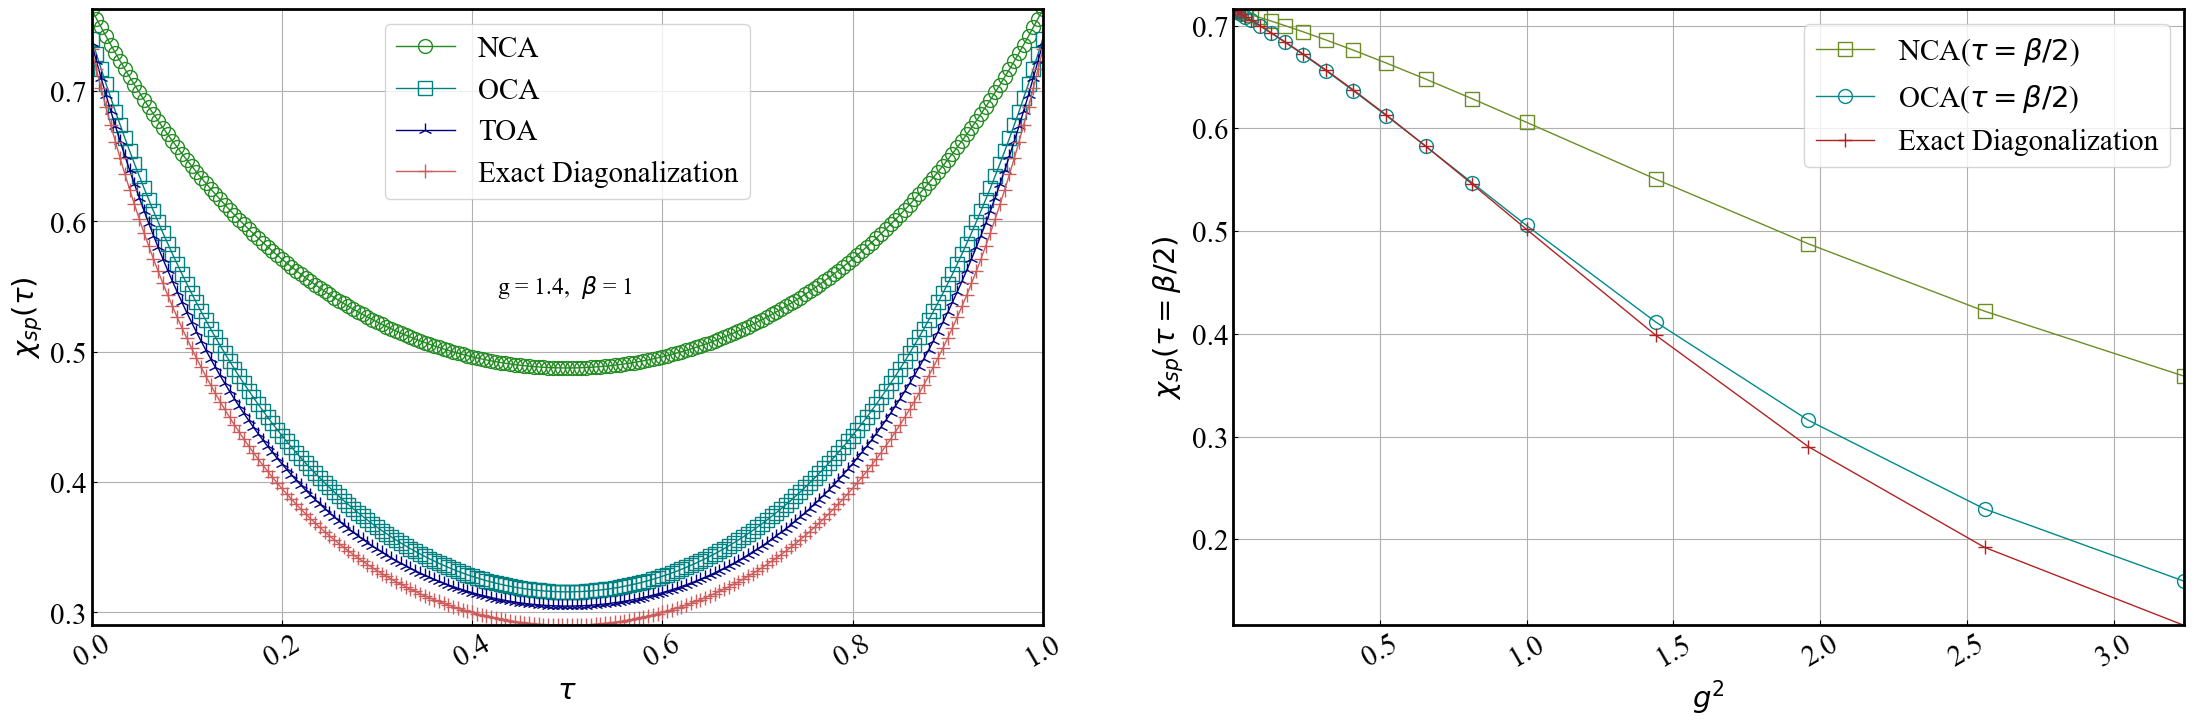

In [36]:
fig = plt.figure(figsize=(27,8))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 21})
mk = MarkerStyle('o','none')
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
mpl.rcParams['axes.linewidth'] = 2

ax0 = fig.add_subplot(gs[0,0])

ax0.plot(tau,globals()['N_1_{}'.format(gc)],label='NCA',linewidth='1', color = 'forestgreen',marker='o',mfc='None',markersize=10)
ax0.plot(tau,globals()['O_1_{}'.format(gc)],label='OCA',linewidth='1', color = 'teal',marker='s',mfc='None',markersize=10)
ax0.plot(tau,TO_1_14,label='TOA',linewidth='1',color='navy',marker='2',markersize=10)
ax0.plot(tau,globals()['ED_1_{}'.format(gc)],label='Exact Diagonalization',linewidth='1',color = 'indianred',marker='+',markersize=10)
plt.text(0.426,0.545,'g = ' + tit1 + r',  $\beta$ = ' + tit2 ,fontsize=17)
plt.grid()
plt.legend()
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.xticks(rotation=30)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\chi_{sp}(\tau)$')
ax0 = plt.gca()
ax0.set_xlim([min(tau), max(tau)])
ax0.set_ylim([min(ED_1_21), max(N_1_21)])

ax2= fig.add_subplot(gs[0,1])
ax2.plot(arr_sq,Ntaumid1,label=r'NCA($\tau = \beta/2$)',linewidth='1',color='olivedrab',marker='s',mfc='None',markersize=10)
ax2.plot(arr_sq,Otaumid1,label=r'OCA($\tau = \beta/2$)',linewidth='1',color='darkcyan',marker='o',mfc='None',markersize=10)
ax2.plot(arr_sq,Etaumid1,label='Exact Diagonalization',color='firebrick',marker='+',linewidth='1',markersize=10)
#ax1.set_xticks(arr1])
#ax1.icklabels(arr1], rotat)
ax2.set_xlim([min(arr_sq), max(arr_sq)])
ax2.set_ylim([min(Etaumid1), max(Ntaumid1)])
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
#plt.text(0.1,0.033,r'$\chi_{sp}(\tau=\beta/2)$',fontsize=12)
#plt.title(r"g ")
plt.xticks(rotation=30)
plt.xlabel(r"$g^2$")
plt.ylabel(r"$\chi_{sp}(\tau=\beta/2)$")
plt.legend()
plt.grid()